# ClearML для отслеживания ML-экспериментов

Представьте ситуацию: вы обучили десяток моделей за неделю, перебирая learning rate, batch size, архитектуры. В процессе экспериментов вы можете вспомнить, что когда то получился хороший результат, вы думали его улучшить, но сейчас понимаете, что лучше бы вернуться к той самой версии. Проблема в том, что вы не можете вспомнить: какие  гиперпараметры использовались? Какое качество было? Когда точно была обучена эта модель?


Можно, конечно, писать результаты в Excel или вести заметки в блокноте. Но это:
* Легко забыть записать что-то важное
* Сложно сравнивать десятки экспериментов
* Невозможно воспроизвести результат через месяц
* Нет версионирования кода и данных

**ClearML** решает эту проблему автоматически. Это open-source платформа для трекинга ML-экспериментов, которая:
* Автоматически логирует параметры, метрики, модели
* Предоставляет веб-интерфейс для визуализации и сравнения
* Сохраняет версии кода и зависимостей
* Позволяет воспроизводить эксперименты одной кнопкой

Сегодня мы на практике научимся использовать ClearML для отслеживания экспериментов обучения нейросетей.

Полезные ссылки:
* [Официальная документация ClearML](https://clear.ml/docs/latest/)
* [GitHub репозиторий](https://github.com/allegroai/clearml)
* [ClearML vs Other MLOps Tools](https://clear.ml/blog/clearml-vs-other-mlops-tools)

## Архитектура ClearML



ClearML состоит из трёх компонентов:

**1. ClearML SDK** — Python библиотека, которую вы добавляете в свой код. Она автоматически отслеживает:
   - Параметры обучения (learning rate, batch size, epochs)
   - Метрики (loss, accuracy, F1-score)
   - Артефакты (веса модели, графики, confusion matrix)
   - Версию кода и окружения (pip packages)

**2. ClearML Server** — backend, который хранит всю информацию. Можно использовать:
   - Облачную версию (бесплатно для малых команд)
   - Self-hosted версию (для больших компаний)

**3. Web UI** — интерфейс для визуализации, где вы видите:
   - Таблицу всех экспериментов
   - Графики метрик в реальном времени
   - Сравнение нескольких экспериментов
   - Сохранённые модели и артефакты

Для начала нам понадобится только SDK и бесплатный облачный аккаунт.

## Ключевые преимущества ClearML:



**Минимальные изменения кода.** Достаточно добавить `Task.init()` в начало, и большая часть логирования происходит автоматически. Это особенно ценно для существующих проектов.

**Воспроизводимость результатов.** ClearML сохраняет не только метрики, но и версию кода, зависимости, параметры. Через месяц вы сможете точно воспроизвести любой эксперимент.

**Командная работа.** Все эксперименты централизованы в одном месте. Коллеги могут видеть ваши результаты, клонировать успешные эксперименты, продолжать работу.

**Удалённое выполнение.** Возможность разработать эксперимент локально, а запустить на мощной машине без изменений кода это огромная экономия времени.


## Установка и настройка

In [ ]:
# Устанавливаем ClearML и PyTorch для экспериментов
!pip install -q clearml torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.6 MB/s eta 0:00:00


### Получение учётных данных



Для работы с ClearML нужно получить API credentials:

1. Перейдите на [https://app.clear.ml](https://app.clear.ml)
2. Зарегистрируйтесь
3. После входа нажмите на свой профиль (правый верхний угол)
4. Выберите **Settings** → **Workspace** → **Create new credentials**
5. Скопируйте сгенерированные credentials

Нам нужны три значения:
- `api_key`
- `api_secret`
- `api_host` (обычно https://api.clear.ml)

В Colab мы настроим это программно:

In [ ]:
from clearml import Task

# Если это первый запуск, ClearML попросит credentials
# В Colab вы можете настроить credentials программно:

# Вариант 1: Через переменные окружения (рекомендуется для Colab)
import os
os.environ['CLEARML_API_ACCESS_KEY'] = 'YOUR_API_KEY_HERE'
os.environ['CLEARML_API_SECRET_KEY'] = 'YOUR_SECRET_KEY_HERE'
os.environ['CLEARML_API_HOST'] = 'https://api.clear.ml'

# Проверяем подключение
print("✅ ClearML настроен и готов к работе!")
print("Веб-интерфейс доступен по адресу: https://app.clear.ml")

## Базовый пример: первый эксперимент




Начнём с простого эксперимента. Обучим маленькую нейросеть на MNIST и посмотрим, как ClearML автоматически логирует всё важное.

Ключевая особенность ClearML: **минимальное вмешательство в код**. Достаточно добавить одну строчку `Task.init()` в начале скрипта, и ClearML начнёт отслеживать эксперимент автоматически.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from clearml import Task

# Это всё, что нужно для начала
task = Task.init(
    project_name='MNIST Tutorial',
    task_name='baseline experiment'
)

# Определяем гиперпараметры
params = {
    'learning_rate': 0.001,
    'batch_size': 64,
    'epochs': 3,
    'hidden_size': 128
}

# ClearML автоматически залогирует эти параметры
task.connect(params)

print(f"Параметры эксперимента: {params}")

ClearML Task: created new task id=72f380811d1c4ba98dcbd67272920aa7


/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


ClearML results page: https://app.clear.ml/projects/92d2b784b7f14cb6ba0def3936474a22/experiments/72f380811d1c4ba98dcbd67272920aa7/output/log
Параметры эксперимента: {'learning_rate': 0.001, 'batch_size': 64, 'epochs': 3, 'hidden_size': 128}


In [ ]:
# Простая нейросеть для классификации MNIST
class SimpleNN(nn.Module):
    def __init__(self, hidden_size):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Загружаем данные
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=params['batch_size'], shuffle=False)

# Инициализируем модель
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleNN(hidden_size=params['hidden_size']).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])

print(f"✅ Модель создана, используем: {device}")
print(f"Размер train set: {len(train_dataset)}, test set: {len(test_dataset)}")

100%|██████████| 9.91M/9.91M [00:01<00:00, 4.97MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 117kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.20MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.05MB/s]


✅ Модель создана, используем: cuda
Размер train set: 60000, test set: 10000


### Явное логирование метрик



ClearML может автоматически отслеживать многие популярные фреймворки (TensorBoard, PyTorch Lightning, Keras). Но можно также логировать метрики явно через `Logger`.

Это даёт больше контроля: вы можете логировать любые кастомные метрики, графики, изображения.

In [ ]:
# Получаем logger для явного логирования метрик
logger = task.get_logger()

def train_epoch(epoch):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        total += target.size(0)

        # Логируем метрики каждые 100 батчей
        if batch_idx % 100 == 0:
            iteration = epoch * len(train_loader) + batch_idx
            logger.report_scalar(
                title='Training',
                series='loss',
                value=loss.item(),
                iteration=iteration
            )

    avg_loss = total_loss / len(train_loader)
    accuracy = 100. * correct / total

    # Логируем средние значения за эпоху
    logger.report_scalar(
        title='Epoch Metrics',
        series='train_loss',
        value=avg_loss,
        iteration=epoch
    )
    logger.report_scalar(
        title='Epoch Metrics',
        series='train_accuracy',
        value=accuracy,
        iteration=epoch
    )

    return avg_loss, accuracy

def evaluate(epoch):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader)
    accuracy = 100. * correct / len(test_dataset)

    # Логируем метрики валидации
    logger.report_scalar(
        title='Epoch Metrics',
        series='test_loss',
        value=test_loss,
        iteration=epoch
    )
    logger.report_scalar(
        title='Epoch Metrics',
        series='test_accuracy',
        value=accuracy,
        iteration=epoch
    )

    return test_loss, accuracy

# Запускаем обучение
for epoch in range(params['epochs']):
    train_loss, train_acc = train_epoch(epoch)
    test_loss, test_acc = evaluate(epoch)

    print(f"Epoch {epoch+1}/{params['epochs']}:")
    print(f"  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"  Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%\n")

print("✅ Обучение завершено!")
print(f"Accuracy на тесте: {test_acc:.2f}%")

Epoch 1/3:
  Train Loss: 0.2600, Train Acc: 92.34%
  Test Loss: 0.1280, Test Acc: 96.10%

Epoch 2/3:
  Train Loss: 0.1115, Train Acc: 96.68%
  Test Loss: 0.0943, Test Acc: 97.14%

Epoch 3/3:
  Train Loss: 0.0796, Train Acc: 97.61%
  Test Loss: 0.0949, Test Acc: 97.01%

✅ Обучение завершено!
Accuracy на тесте: 97.01%


### Сохранение артефактов



ClearML позволяет сохранять не только метрики, но и любые файлы: модели, графики, confusion matrix, примеры предсказаний. Это называется **артефактами**.

Давайте сохраним обученную модель и визуализацию предсказаний.

✅ Модель сохранена как артефакт


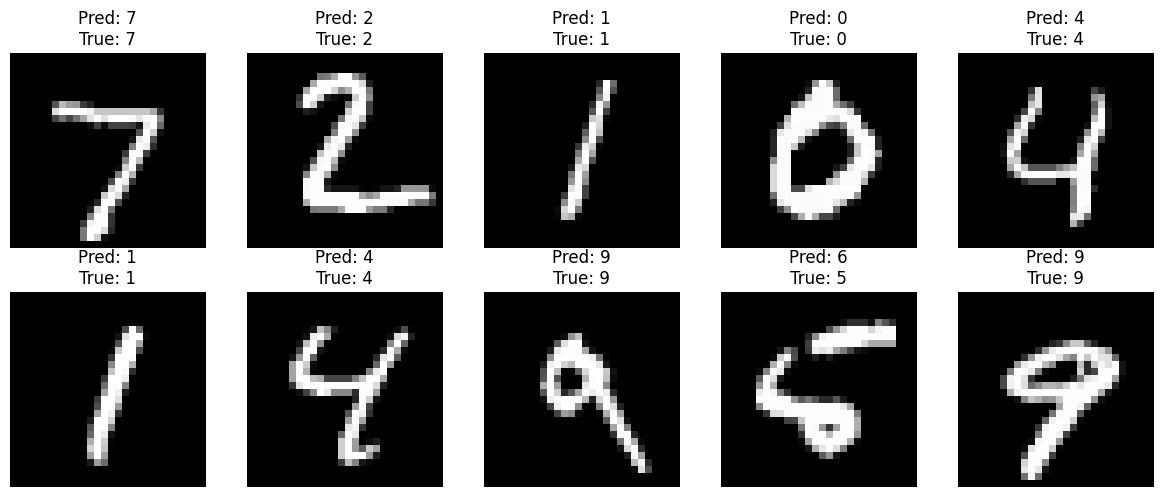

✅ Визуализация предсказаний загружена


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Сохраняем модель локально
model_path = 'mnist_model.pth'
torch.save(model.state_dict(), model_path)

# Загружаем модель как артефакт в ClearML
task.upload_artifact(
    name='trained_model',
    artifact_object=model_path
)

print("✅ Модель сохранена как артефакт")

# Визуализируем примеры предсказаний
model.eval()
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

with torch.no_grad():
    example_data = example_data.to(device)
    output = model(example_data)
    predictions = output.argmax(dim=1)

# Создаём визуализацию
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for idx, ax in enumerate(axes.flat):
    ax.imshow(example_data[idx].cpu().squeeze(), cmap='gray')
    ax.set_title(f'Pred: {predictions[idx].item()}\nTrue: {example_targets[idx].item()}')
    ax.axis('off')

plt.tight_layout()
plt.savefig('predictions.png', dpi=100, bbox_inches='tight')
plt.show()

# Загружаем изображение в ClearML
logger.report_image(
    title='Predictions',
    series='sample_predictions',
    iteration=0,
    local_path='predictions.png'
)

print("✅ Визуализация предсказаний загружена")

Давайте также создадим confusion matrix

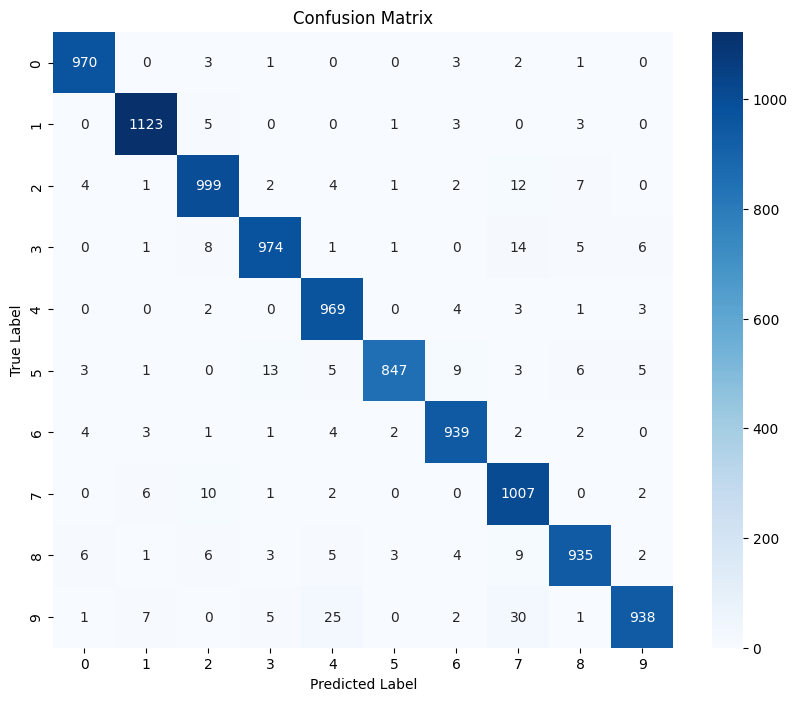

✅ Confusion matrix загружена в ClearML


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Собираем все предсказания
all_preds = []
all_targets = []

model.eval()
with torch.no_grad():
    for data, target in test_loader:
        data = data.to(device)
        output = model(data)
        pred = output.argmax(dim=1)
        all_preds.extend(pred.cpu().numpy())
        all_targets.extend(target.numpy())

# Создаём confusion matrix
cm = confusion_matrix(all_targets, all_preds)

# Визуализируем
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png', dpi=100, bbox_inches='tight')
plt.show()

# Загружаем в ClearML
logger.report_confusion_matrix(
    title='Confusion Matrix',
    series='Test Set',
    matrix=cm,
    iteration=0,
    xaxis='Predicted',
    yaxis='Actual'
)

print("✅ Confusion matrix загружена в ClearML")

Отлично! Теперь завершим задачу и посмотрим результаты в веб-интерфейсе.

In [ ]:
# Явно закрываем задачу
task.close()

print("✅ Эксперимент завершён!")
print("\n📊 Откройте веб-интерфейс ClearML:")
print("   https://app.clear.ml")
print("\n🔍 Что вы увидите:")
print("   - Все параметры эксперимента")
print("   - Графики метрик (loss, accuracy)")
print("   - Confusion matrix")
print("   - Примеры предсказаний")
print("   - Сохранённую модель")
print("   - Версию кода и зависимостей")

✅ Эксперимент завершён!

📊 Откройте веб-интерфейс ClearML:
   https://app.clear.ml

🔍 Что вы увидите:
   - Все параметры эксперимента
   - Графики метрик (loss, accuracy)
   - Confusion matrix
   - Примеры предсказаний
   - Сохранённую модель
   - Версию кода и зависимостей


## Сравнение экспериментов



Теперь, когда мы понимаем основы, давайте запустим серию экспериментов с разными гиперпараметрами и сравним результаты.

 ClearML позволяет:
* Запускать множественные эксперименты
* Автоматически логировать всё
* Сравнивать результаты в веб-интерфейсе
* Клонировать лучший эксперимент для продакшена или других серий экспериментов


In [ ]:
# Определяем конфигурации для экспериментов
experiment_configs = [
    {
        'name': 'small_lr',
        'learning_rate': 0.0001,
        'hidden_size': 128,
        'batch_size': 64
    },
    {
        'name': 'large_lr',
        'learning_rate': 0.01,
        'hidden_size': 128,
        'batch_size': 64
    },
    {
        'name': 'large_network',
        'learning_rate': 0.001,
        'hidden_size': 512,
        'batch_size': 64
    },
    {
        'name': 'large_batch',
        'learning_rate': 0.001,
        'hidden_size': 512,
        'batch_size': 256
    }
]


In [ ]:
def run_experiment(config, epochs=2):

    # Создаём новую задачу для каждого эксперимента
    task = Task.init(
        project_name='MNIST Hyperparameter Search',
        task_name=config['name'],
        reuse_last_task_id=False  # Всегда создавать новую задачу
    )

    # Логируем параметры
    params = {
        'learning_rate': config['learning_rate'],
        'batch_size': config['batch_size'],
        'epochs': epochs,
        'hidden_size': config['hidden_size']
    }
    task.connect(params)

    logger = task.get_logger()

    # Создаём DataLoader с нужным batch_size
    train_loader = DataLoader(
        train_dataset,
        batch_size=params['batch_size'],
        shuffle=True
    )
    test_loader = DataLoader(
        test_dataset,
        batch_size=params['batch_size'],
        shuffle=False
    )

    # Создаём модель
    model = SimpleNN(hidden_size=params['hidden_size']).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])

    # Обучаем
    best_acc = 0
    for epoch in range(epochs):
        # Training
        model.train()
        train_loss = 0
        correct = 0
        total = 0

        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            total += target.size(0)

        train_loss /= len(train_loader)
        train_acc = 100. * correct / total

        # Validation
        model.eval()
        test_loss = 0
        correct = 0

        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                test_loss += criterion(output, target).item()
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()

        test_loss /= len(test_loader)
        test_acc = 100. * correct / len(test_dataset)

        # Логируем метрики
        logger.report_scalar('Loss', 'train', value=train_loss, iteration=epoch)
        logger.report_scalar('Loss', 'test', value=test_loss, iteration=epoch)
        logger.report_scalar('Accuracy', 'train', value=train_acc, iteration=epoch)
        logger.report_scalar('Accuracy', 'test', value=test_acc, iteration=epoch)

        best_acc = max(best_acc, test_acc)

    # Логируем финальную метрику
    logger.report_single_value(name='best_test_accuracy', value=best_acc)

    task.close()

    return best_acc

# Запускаем все эксперименты
results = {}

for config in experiment_configs:
    print(f"\n{'='*50}")
    print(f"🔬 Эксперимент: {config['name']}")
    print(f"   LR: {config['learning_rate']}, Hidden: {config['hidden_size']}, Batch: {config['batch_size']}")
    print(f"{'='*50}\n")

    best_acc = run_experiment(config, epochs=2)
    results[config['name']] = best_acc

    print(f"\n✅ {config['name']}: Best Test Accuracy = {best_acc:.2f}%\n")

print("\n" + "="*50)
print("📊 РЕЗУЛЬТАТЫ ВСЕХ ЭКСПЕРИМЕНТОВ:")
print("="*50)
for name, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"   {name:20s}: {acc:.2f}%")
print("="*50)


🔬 Эксперимент: small_lr
   LR: 0.0001, Hidden: 128, Batch: 64

ClearML Task: created new task id=5dac5470b792479dbbe4283201289aee
ClearML results page: https://app.clear.ml/projects/3c3a243676304fa390f644b9e98b0ff9/experiments/5dac5470b792479dbbe4283201289aee/output/log

✅ small_lr: Best Test Accuracy = 93.14%


🔬 Эксперимент: large_lr
   LR: 0.01, Hidden: 128, Batch: 64

ClearML Task: created new task id=7612094c74864d0b8f719eb78fd13077
ClearML results page: https://app.clear.ml/projects/3c3a243676304fa390f644b9e98b0ff9/experiments/7612094c74864d0b8f719eb78fd13077/output/log

✅ large_lr: Best Test Accuracy = 94.79%


🔬 Эксперимент: large_network
   LR: 0.001, Hidden: 512, Batch: 64

ClearML Task: created new task id=19478d9bde9f48988aac72a54891cc17
ClearML results page: https://app.clear.ml/projects/3c3a243676304fa390f644b9e98b0ff9/experiments/19478d9bde9f48988aac72a54891cc17/output/log

✅ large_network: Best Test Accuracy = 97.49%


🔬 Эксперимент: large_batch
   LR: 0.001, Hidden: 5

### Сравнение экспериментов в Web UI



Теперь откройте [https://app.clear.ml](https://app.clear.ml) и перейдите в проект **"MNIST Hyperparameter Search"**.

Вы увидите все четыре эксперимента. Попробуйте:

**1. Таблица экспериментов:**
   - Отображает все эксперименты с их параметрами
   - Можно сортировать по метрикам (accuracy, loss)
   - Можно фильтровать по параметрам



<img src="https://ml.gan4x4.ru/wb/cv/images/accuracy_plots.png" width="2200"/>


**2. Сравнение графиков:**
   - Выберите несколько экспериментов (checkbox слева)
   - Нажмите "Compare"
   - Увидите графики всех экспериментов на одном графике



<img src="https://ml.gan4x4.ru/wb/cv/images/accuracy_compare.png" width="2200"/>



## Автоматическое логирование популярных фреймворков



ClearML умеет автоматически интегрироваться с популярными ML-фреймворками:

**PyTorch Lightning:**
```python
from clearml import Task
task = Task.init(project_name='...', task_name='...')

# Lightning автоматически залогирует все метрики из Trainer!
trainer = pl.Trainer(...)
trainer.fit(model)
```


**XGBoost/LightGBM:**
```python
from clearml import Task
task = Task.init(project_name='...', task_name='...')

# Параметры и метрики логируются автоматически
model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)
```

В большинстве случаев достаточно добавить `Task.init()` в начало кода!

## Удалённое выполнение экспериментов



Одна из мощных функций ClearML это возможность клонировать и запускать эксперименты удалённо.

**Сценарий использования:**
1. Вы разработали эксперимент в Colab или локально
2. ClearML сохранил версию кода и параметры
3. Вы можете клонировать этот эксперимент в Web UI
4. Изменить параметры (например, увеличить epochs с 2 до 50)
5. Отправить на выполнение на удалённую машину с GPU

**Как это работает:**

Вам нужно настроить **ClearML Agent** это программа, которая:
- Подключается к ClearML Server
- Ждёт задачи в очереди
- Автоматически клонирует код из git
- Устанавливает зависимости
- Запускает эксперимент
- Отправляет результаты обратно в ClearML

**Установка Agent на удалённой машине:**
```bash
pip install clearml-agent
clearml-agent init  # Настройка credentials
clearml-agent daemon --queue default --gpus 0  # Запуск агента
```

После этого вы можете:
- В Web UI выбрать эксперимент
- Нажать "Clone"
- Изменить параметры
- Нажать "Enqueue" и выбрать очередь
- Агент автоматически подхватит и запустит задачу!



## Best Practices



**1. Организация проектов:**
   - Используйте осмысленные названия проектов: `"Image Classification"`, `"NER Models"`, `"Production Models"`
   - Группируйте связанные эксперименты в один проект
   - Используйте префиксы в именах задач: `"baseline_v1"`, `"resnet_lr_0.01"`, `"production_final"`

**2. Логирование метрик:**
   - Логируйте основные метрики каждую эпоху (train/val loss, accuracy)
   - Для долгого обучения логируйте чаще (каждые N батчей)
   - Добавляйте кастомные метрики, специфичные для задачи
   - Используйте одинаковые названия метрик для сравнения

**3. Параметры:**
   - Логируйте ВСЕ значимые параметры (learning rate, batch size, architecture)
   - Используйте `task.connect(config_dict)` для словарей параметров
   - Не хардкодьте параметры, а используйте переменные

**4. Артефакты:**
   - Сохраняйте финальные модели
   - Сохраняйте промежуточные checkpoints для долгого обучения
   - Добавляйте confusion matrix для классификации
   - Сохраняйте примеры предсказаний на валидации

**5. Версионирование:**
   - Храните код в git
   - ClearML автоматически сохранит git commit hash
   - Используйте requirements.txt или environment.yml

**6. Очистка:**
   - Архивируйте старые неудачные эксперименты
   - Помечайте лучшие модели тегами: `"production"`, `"best_model"`, `"baseline"`
   - Регулярно чистите эксперименты

## Заключение и выводы



В этом блокноте мы познакомились с ClearML, инструментом для отслеживания ML-экспериментов. Мы научились:

**Базовые навыки:**
* Настраивать ClearML и подключаться к облачному серверу
* Создавать эксперимент с `Task.init()`
* Автоматически логировать параметры через `task.connect()`
* Явно логировать метрики через `logger.report_scalar()`

**Работа с артефактами:**
* Сохранять обученные модели
* Загружать визуализации и графики
* Создавать confusion matrix
* Сохранять примеры предсказаний

**Продвинутые возможности:**
* Запускать множественные эксперименты с разными конфигурациями
* Сравнивать результаты в Web UI
* Организовывать проекты и именовать эксперименты


 Следующие шаги:

1. Попробуйте интегрировать ClearML в ваш текущий проект
2. Изучите [документацию](https://clear.ml/docs/) для продвинутых функций
3. Попробуйте автоматический hyperparameter optimization с помощью ClearML

Теперь у вас есть инструмент, который поможет никогда не терять результаты экспериментов и всегда понимать, как был получен тот или иной результат!